<a href="https://colab.research.google.com/github/franallemandi/curso_data_science/blob/main/Pre_entrega_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto :** **Modelo de Predicción Supermercado**

# **Importar Dataset**

In [ ]:
#Importar Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargamos el archivo compartido desde Drive
url = "https://drive.google.com/uc?id="
ext = "1ED11_hak8OiNdX7ov8-2XdNIk4-2SBBv"
df = pd.read_excel(url+ext)

In [ ]:
#Mostrar el dataset
df

,SUPERMERCADOS,CATEGORIA,DESCRIPCION,TIPO_ENVASE,PRECIO,PRECIO_TOTAL,UNIDADES,FECHA_INGRESO
0,mercadona-es,postres_y_yogures_yogures_liquidos,Bebida láctea sin lactosa de fresa Hacendado,Pack-4,14.0,219.0,kg,2020-12-23 00:00:00
1,mercadona-es,bodega_licores,Ginebra 15 botanicals Blumara,Botella,1075.0,1536.0,L,2020-11-06 12:00:00
2,mercadona-es,charcuteria_y_quesos_queso_untable_y_fresco,Queso fresco batido desnatado Hacendado 0% mat...,Tarrina,109.0,218.0,kg,2020-09-23 16:06:00
3,carrefour-es,la_despensa_yogures_y_postres_yogures_desnatados,Yogur bífidus desnatado con lima y limón Danon...,Pack 4x120 G.,208.0,433.0,kg,2020-10-10 00:00:00
4,carrefour-es,la_despensa_helados_bombon,Helado After Dinner Magnum sin gluten 10 ud.,10 Ud.,46.0,46.0,ud,2020-10-15 00:00:00
...,...,...,...,...,...,...,...,...
65530,carrefour-es,la_despensa_conservas_sopas_y_precocinados_con...,Anchoas del Cantábrico en aceite de oliva virg...,60 G.,90.0,1500.0,kg,2020-11-03 12:00:00
65531,carrefour-es,la_despensa_cestas_y_lotes_perfumeria_para_reg...,Estuche Brummel Man: Colonia 125 ml y After Sh...,1 Ud.,80.0,80.0,ud,2020-11-10 12:00:00
65532,carrefour-es,la_despensa_yogures_y_postres_yogures_desnatados,"Yogur desnatado con trozos de frutas de fresa,...",Pack 12x125 G.,23.0,153.0,kg,2020-12-10 00:00:00
65533,carrefour-es,el_mercado_quesos_tierno,queso tierno El Cigarral 960 g,NaN,1305.0,1359.0,kg,2021-01-16 00:00:00


# **Exploración de Dataset**

In [ ]:
#Generar un Shape para validar las dimensiones del Dataset
df.shape

(65535, 8)

In [ ]:
#Llamo la cabecera del archivo para validar el mismo
df.head()

,SUPERMERCADOS,CATEGORIA,DESCRIPCION,TIPO_ENVASE,PRECIO,PRECIO_TOTAL,UNIDADES,FECHA_INGRESO
0,mercadona-es,postres_y_yogures_yogures_liquidos,Bebida láctea sin lactosa de fresa Hacendado,Pack-4,14.0,219.0,kg,2020-12-23 00:00:00
1,mercadona-es,bodega_licores,Ginebra 15 botanicals Blumara,Botella,1075.0,1536.0,L,2020-11-06 12:00:00
2,mercadona-es,charcuteria_y_quesos_queso_untable_y_fresco,Queso fresco batido desnatado Hacendado 0% mat...,Tarrina,109.0,218.0,kg,2020-09-23 16:06:00
3,carrefour-es,la_despensa_yogures_y_postres_yogures_desnatados,Yogur bífidus desnatado con lima y limón Danon...,Pack 4x120 G.,208.0,433.0,kg,2020-10-10 00:00:00
4,carrefour-es,la_despensa_helados_bombon,Helado After Dinner Magnum sin gluten 10 ud.,10 Ud.,46.0,46.0,ud,2020-10-15 00:00:00


In [ ]:
#llamo los ultimos registros del archivo para validar el mismo
df.tail()

,SUPERMERCADOS,CATEGORIA,DESCRIPCION,TIPO_ENVASE,PRECIO,PRECIO_TOTAL,UNIDADES,FECHA_INGRESO
65530,carrefour-es,la_despensa_conservas_sopas_y_precocinados_con...,Anchoas del Cantábrico en aceite de oliva virg...,60 G.,90.0,1500.0,kg,2020-11-03 12:00:00
65531,carrefour-es,la_despensa_cestas_y_lotes_perfumeria_para_reg...,Estuche Brummel Man: Colonia 125 ml y After Sh...,1 Ud.,80.0,80.0,ud,2020-11-10 12:00:00
65532,carrefour-es,la_despensa_yogures_y_postres_yogures_desnatados,"Yogur desnatado con trozos de frutas de fresa,...",Pack 12x125 G.,23.0,153.0,kg,2020-12-10 00:00:00
65533,carrefour-es,el_mercado_quesos_tierno,queso tierno El Cigarral 960 g,NaN,1305.0,1359.0,kg,2021-01-16 00:00:00
65534,carrefour-es,bebe_puericultura_accesorios,Limpiador de biberones y tetinas ecológico Fro...,500 Ml.,269.0,538.0,100 ml,2020-10-06 12:00:00


In [ ]:
#Validamos el listado de las columnas
df.columns

Index(['SUPERMERCADOS', 'CATEGORIA', 'DESCRIPCION', 'TIPO_ENVASE', 'PRECIO',
       'PRECIO_TOTAL', 'UNIDADES', 'FECHA_INGRESO'],
      dtype='object')

In [ ]:
#Validamos las columnas, la cantidad de datos nulos y el tipo de formato de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SUPERMERCADOS  65535 non-null  object        
 1   CATEGORIA      65535 non-null  object        
 2   DESCRIPCION    65535 non-null  object        
 3   TIPO_ENVASE    33314 non-null  object        
 4   PRECIO         65533 non-null  float64       
 5   PRECIO_TOTAL   64936 non-null  float64       
 6   UNIDADES       64936 non-null  object        
 7   FECHA_INGRESO  65533 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 4.0+ MB


In [ ]:
#Haces una descripcion de variable numericas
df.describe()

,PRECIO,PRECIO_TOTAL,FECHA_INGRESO
count,65533.000000,6.493600e+04,65533
mean,351.190820,9.738388e+02,2020-11-21 21:52:14.075045888
min,1.000000,0.000000e+00,2020-07-16 04:00:00
25%,57.000000,7.900000e+01,2020-10-22 00:00:00
50%,154.000000,2.460000e+02,2020-11-27 00:00:00
75%,313.000000,7.440000e+02,2021-01-03 12:00:00
max,247005.000000,1.640299e+06,2021-02-09 12:00:00
std,3573.772969,1.634685e+04,NaN


In [ ]:
#cambiar nombre de columnas
df.rename(columns={"supermarket": "Supermercado",
                   "category" : "Categoria",
                   "name" : "Nombre" ,
                   "description" : "Descripcion",
                   "price":"Precio",
                   "reference price" : "Precio de referencia",
                   "reference_unit": " Unidad de Referencia",
                   "insert_date" : "Fecha de Ingreso",
                   }, inplace=True  )

# **Graficos**

In [ ]:
df_super = df["SUPERMERCADOS"].value_counts()
df_super

,count
SUPERMERCADOS,
carrefour-es,38653
dia-es,13795
mercadona-es,13087


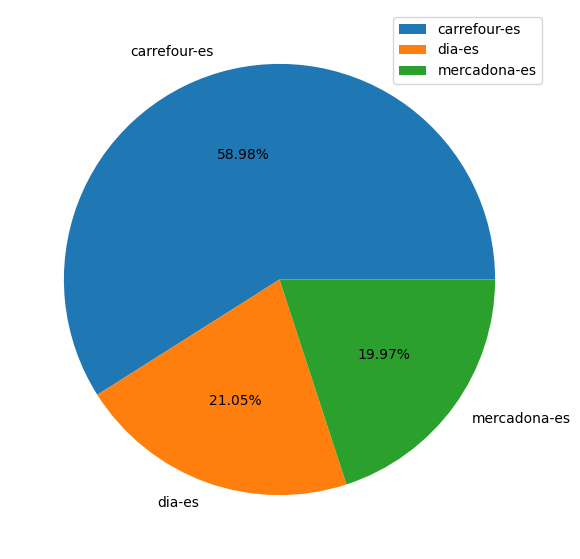

In [ ]:
#Porcentajes de supermercados
df_super = df["SUPERMERCADOS"].value_counts()
fig,ax=plt.subplots(figsize=(7,7))
super =['carrefour-es','dia-es','mercadona-es']
ax.pie(df_super, labels = super , autopct="%.2f%%" )
ax.legend()
plt.show()


<Axes: xlabel='SUPERMERCADOS', ylabel='Count'>

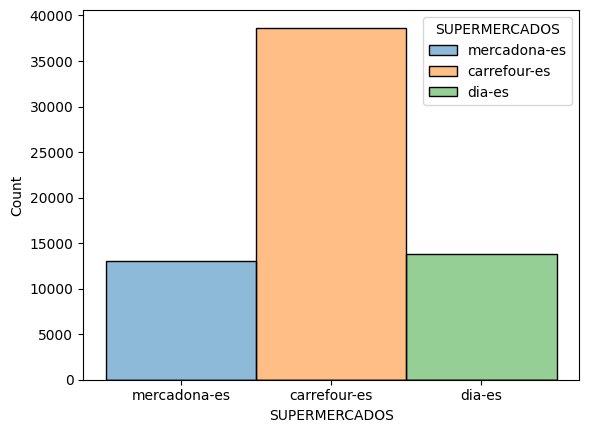

In [ ]:
sns.histplot(data=df, x='SUPERMERCADOS', hue='SUPERMERCADOS')

In [ ]:
df["UNIDADES"].value_counts()

,count
UNIDADES,
kg,24230
ud,11431
€/Kg.,6596
l,6537
€/l.,4871
100 ml,3440
L,2454
€/ud.,2154
100ml,1726


In [ ]:
df_unidades = df["UNIDADES"].value_counts()
df_unidades

,count
UNIDADES,
kg,24230
ud,11431
€/Kg.,6596
l,6537
€/l.,4871
100 ml,3440
L,2454
€/ud.,2154
100ml,1726


<Axes: xlabel='UNIDADES'>

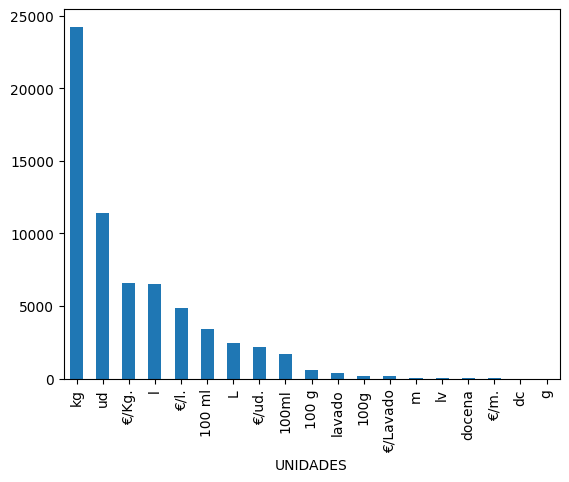

In [ ]:
#cantidad de unidades
cantidad_unidades = df.UNIDADES.value_counts()
cantidad_unidades.plot.bar()

In [ ]:
#AGRUPAMIENTO DE SUPERMERCADO + SUMATORIA DE PRECIO
super_unidad_sum = df.groupby("SUPERMERCADOS")["PRECIO"].sum()
super_unidad_sum

,PRECIO
SUPERMERCADOS,
carrefour-es,11017348.0
dia-es,4477629.0
mercadona-es,7519611.0


Text(0, 0.5, 'PRECIO SUMA')

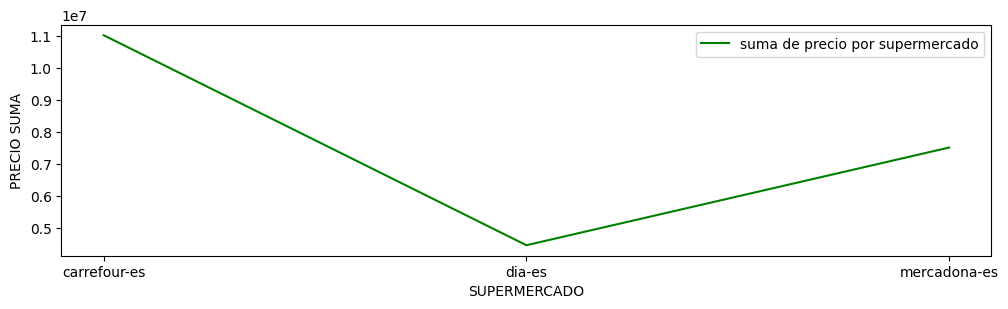

In [ ]:
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(super_unidad_sum, label= "suma de precio por supermercado", c="green")
ax.legend()
ax.set_xlabel("SUPERMERCADO")
ax.set_ylabel("PRECIO SUMA")

In [ ]:
#AGRUPAMIENTO DE SUPERMERCADOS POR PRECIO PROMEDIO
super_unidad = df.groupby("SUPERMERCADOS")["PRECIO"].mean()
super_unidad

,PRECIO
SUPERMERCADOS,
carrefour-es,285.046907
dia-es,324.583472
mercadona-es,574.586307


Text(0, 0.5, 'PRECIO PROMEDIO')

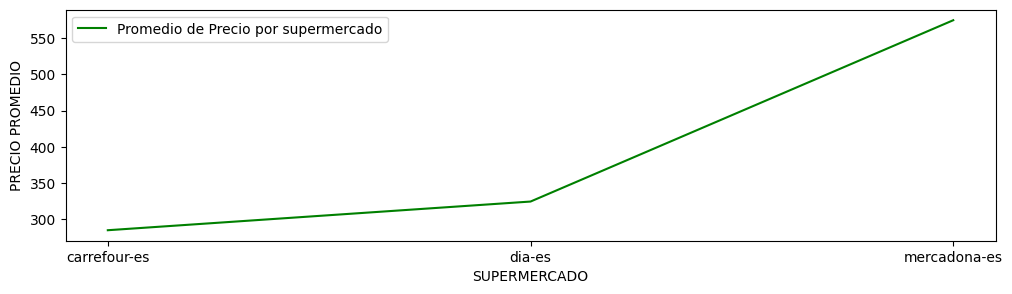

In [ ]:
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(super_unidad, label= "Promedio de Precio por supermercado", c="green")
ax.legend()
ax.set_xlabel("SUPERMERCADO")
ax.set_ylabel("PRECIO PROMEDIO")